<a href="https://colab.research.google.com/github/Basit40/Finding-Embeddings/blob/main/PreParing_data_compitionIV_2a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%%capture
!pip install mne
!pip install moabb
!pip install braindecode



In [ ]:
!cp /content/drive/MyDrive/compIV2_a_b/BCICIV_2a_gdf.zip /content/


In [ ]:
!unzip /content/BCICIV_2a_gdf.zip -d data

Archive:  /content/BCICIV_2a_gdf.zip
  inflating: data/A01E.gdf           
  inflating: data/A01T.gdf           
  inflating: data/A02E.gdf           
  inflating: data/A02T.gdf           
  inflating: data/A03E.gdf           
  inflating: data/A03T.gdf           
  inflating: data/A04E.gdf           
  inflating: data/A04T.gdf           
  inflating: data/A05E.gdf           
  inflating: data/A05T.gdf           
  inflating: data/A06E.gdf           
  inflating: data/A06T.gdf           
  inflating: data/A07E.gdf           
  inflating: data/A07T.gdf           
  inflating: data/A08E.gdf           
  inflating: data/A08T.gdf           
  inflating: data/A09E.gdf           
  inflating: data/A09T.gdf           


In [ ]:
import mne
raw=mne.io.read_raw_gdf('/content/data/A04T.gdf',eog=['EOG-left', 'EOG-central', 'EOG-right'])

Extracting GDF parameters from /content/data/A04T.gdf...
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG
Creating raw.info structure...


/usr/lib/python3.12/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


In [ ]:
raw.drop_channels(['EOG-left', 'EOG-central', 'EOG-right'])

<RawGDF | A04T.gdf, 22 x 600915 (2403.7 s), ~21 KiB, data not loaded>

Reading 0 ... 600914  =      0.000 ...  2403.656 secs...


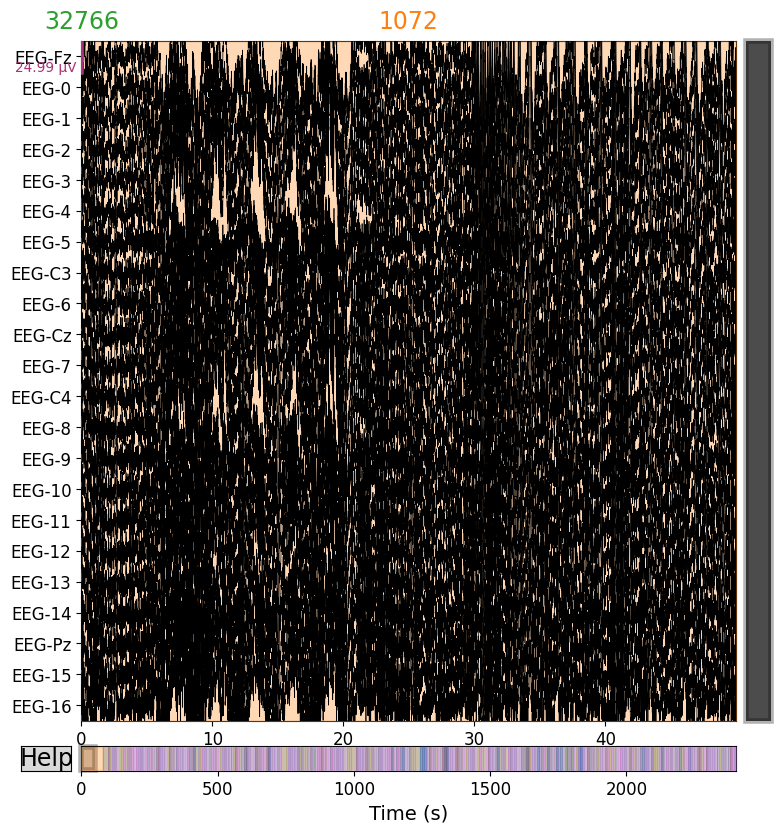

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 3 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 12 (effective, after forward-backward)
- Cutoffs at 3.00, 40.00 Hz: -6.02, -6.02 dB



/tmp/ipython-input-2151577254.py:23: RuntimeWarning: The measurement information indicates a low-pass frequency of 40.0 Hz. The decim=16 parameter will result in a sampling frequency of 15.625 Hz, which can cause aliasing artifacts.
  raw.plot(decim=16,scalings='auto' )


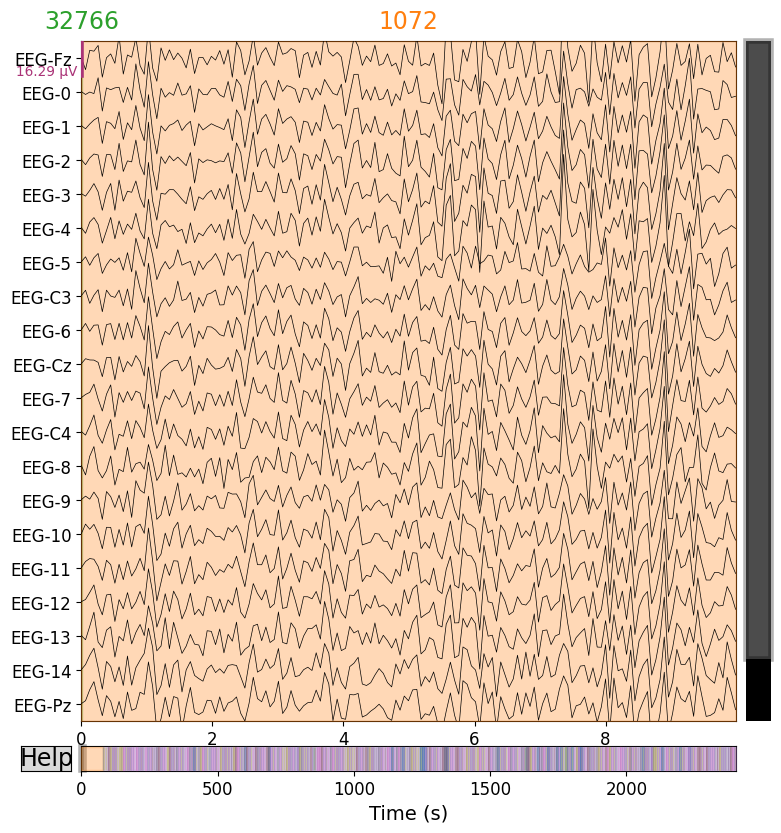

================= (22, 600915)


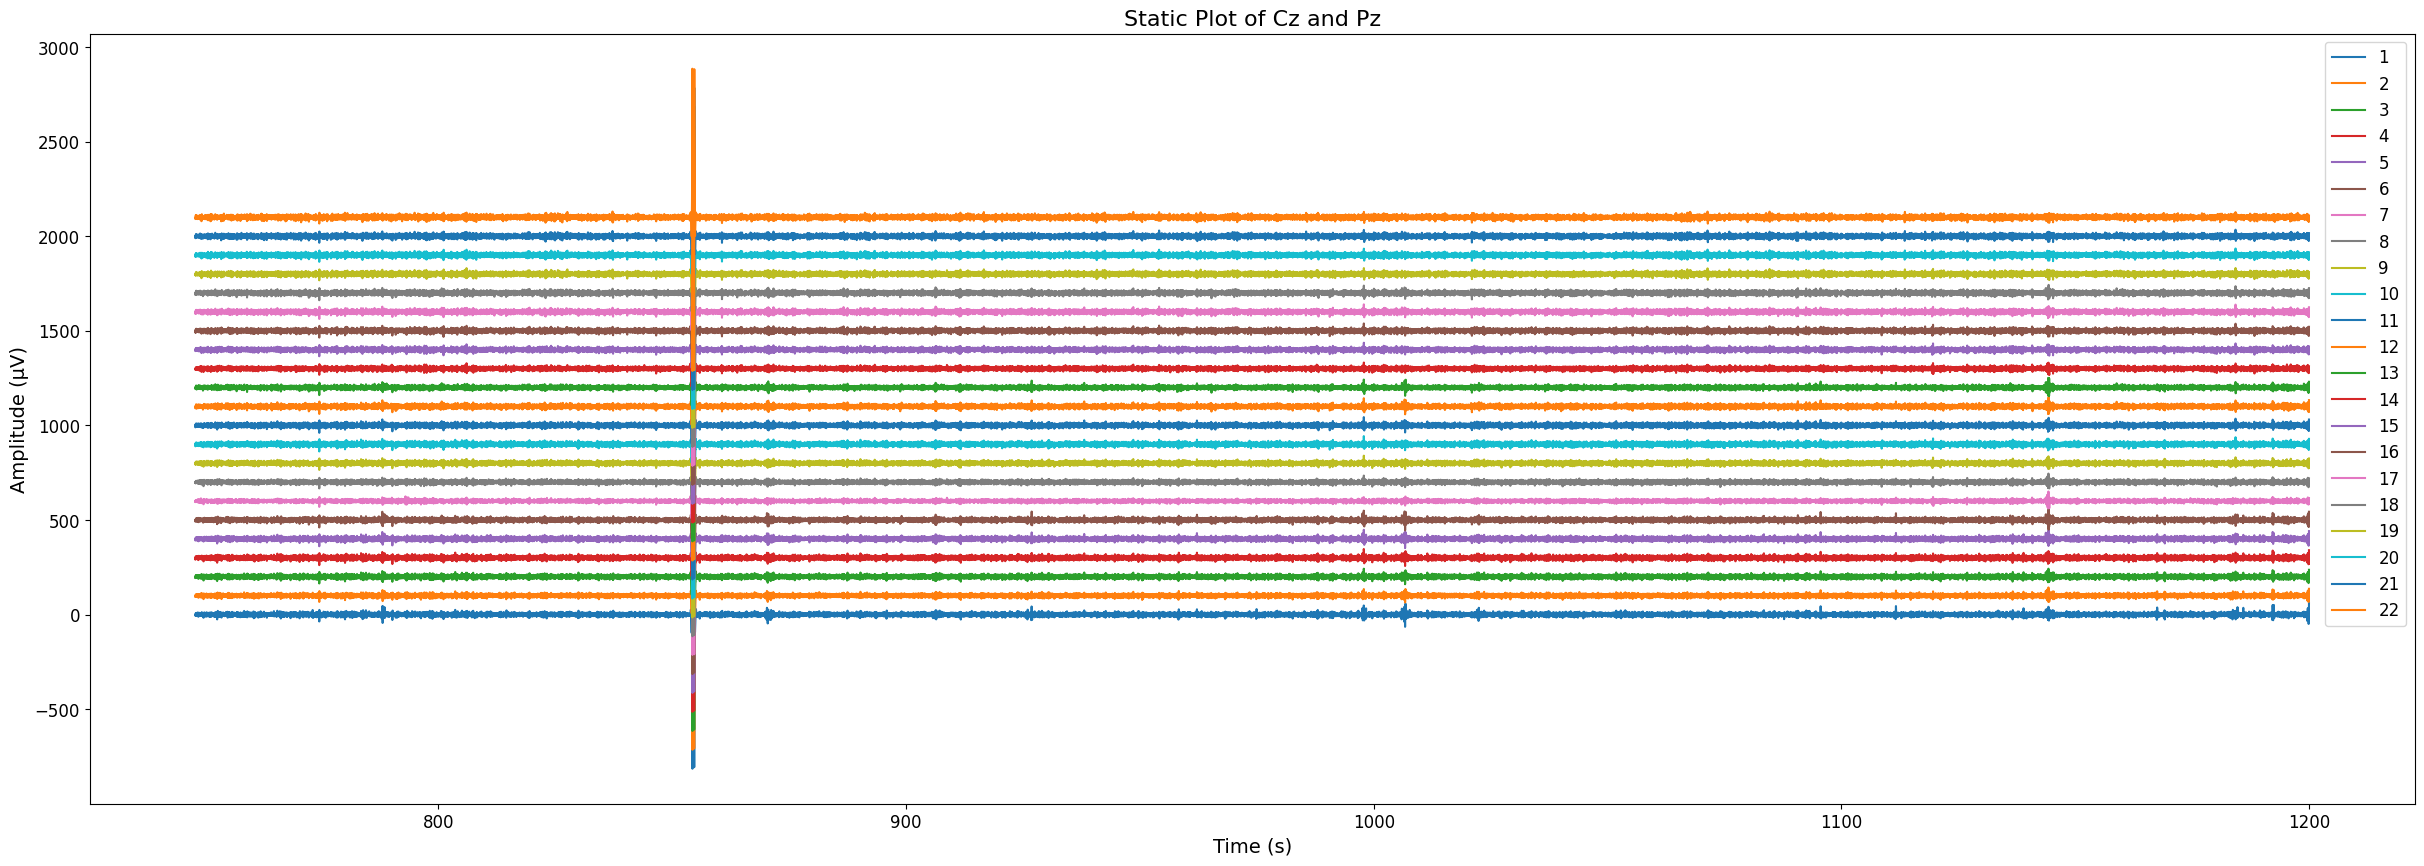

In [ ]:
import matplotlib.pyplot as plt

#plt.rcParams["figure.figsize"] = (10, 1)  # width, height in inches


raw.load_data()
# Step 2: Apply a Butterworth bandpass filter
low_cutoff = 3  # Low cutoff frequency (Hz)
high_cutoff = 40  # High cutoff frequency (Hz)
filter_order = 3  # Filter order (3rd order Butterworth filter)

# channels_to_plot = ['EEG-C3']#, 'EEG-Cz', 'EEG-C4']
# raw.plot(picks=channels_to_plot, block=False, title="EEG Data for", scalings='auto')

raw.plot(n_channels=22,duration=50,scalings='auto',show=True,block=True)


# # Apply the filter
raw.filter(l_freq=low_cutoff, h_freq=high_cutoff, method='iir', iir_params={'order': filter_order, 'ftype': 'butter'})
# raw.plot(picks=channels_to_plot,block=True, title="EEG Data for")#, figsize=(1, 4),  scalings='auto')


raw.plot(decim=16,scalings='auto' )

#raw.plot_sensors(show_names=True)  # Show electrode names
#raw.plot_sensors(kind='3d')  # Show electrode positions in 3D



data, times = raw.copy().get_data(return_times=True)  #pick_channels(['EEG-C3','EEG-C4'])
print('=================',data.shape)
plt.figure(figsize=(30, 10))
for i, ch in enumerate(data):  #['EEG-C3','EEG-C4']
    plt.plot(times[187000:300000], data[i,187000:300000] * 1e6+i*100, label=i+1)  # µV scale
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (µV)")
plt.title("Static Plot of Cz and Pz")
plt.legend()
#plt.tight_layout()
plt.show()

#

In [ ]:
#events
events=mne.events_from_annotations(raw)
print('-----------------')
len(events[0])

Used Annotations descriptions: [np.str_('1023'), np.str_('1072'), np.str_('32766'), np.str_('768'), np.str_('769'), np.str_('770'), np.str_('771'), np.str_('772')]
-----------------


610

In [ ]:
print('type.events>>',type(events))
print('events[0].shape',events[0].shape)
print('events[0][0].shape',events[0][0])
print('events[0][1].shape',events[0][1])
print('events[0][2].shape',events[0][2])
print('events[1].shape',events[1].keys())
events

type.events>> <class 'tuple'>
events[0].shape (610, 3)
events[0][0].shape [0 0 3]
events[0][1].shape [0 0 2]
events[0][2].shape [19905     0     3]
events[1].shape dict_keys([np.str_('1023'), np.str_('1072'), np.str_('32766'), np.str_('768'), np.str_('769'), np.str_('770'), np.str_('771'), np.str_('772')])


(array([[     0,      0,      3],
        [     0,      0,      2],
        [ 19905,      0,      3],
        ...,
        [597378,      0,      6],
        [598937,      0,      4],
        [599437,      0,      5]]),
 {np.str_('1023'): 1,
  np.str_('1072'): 2,
  np.str_('32766'): 3,
  np.str_('768'): 4,
  np.str_('769'): 5,
  np.str_('770'): 6,
  np.str_('771'): 7,
  np.str_('772'): 8})

In [ ]:

eventss, event_id = events

# Now filter
print(eventss[0:9])
filtered_events = eventss[eventss[:, 2] ==5]
print(filtered_events[0:9])
print((filtered_events))


[[    0     0     5]
 [    0     0     3]
 [31513     0     5]
 [31513     0     4]
 [57602     0     5]
 [57602     0     2]
 [96159     0     5]
 [96509     0     6]
 [97009     0     7]]
[[     0      0      5]
 [ 31513      0      5]
 [ 57602      0      5]
 [ 96159      0      5]
 [192994      0      5]
 [289829      0      5]
 [386664      0      5]
 [483499      0      5]
 [580334      0      5]]
[[     0      0      5]
 [ 31513      0      5]
 [ 57602      0      5]
 [ 96159      0      5]
 [192994      0      5]
 [289829      0      5]
 [386664      0      5]
 [483499      0      5]
 [580334      0      5]]


In [ ]:
events[1]

{np.str_('1023'): 1,
 np.str_('1072'): 2,
 np.str_('276'): 3,
 np.str_('277'): 4,
 np.str_('32766'): 5,
 np.str_('768'): 6,
 np.str_('769'): 7,
 np.str_('770'): 8,
 np.str_('771'): 9,
 np.str_('772'): 10}

In [ ]:
# event_dict={  'reject':1,
#             'eye move':2,
#               'eye open':3,
#               'eye close':4,
#               'new run':5,
#               'new trial':6,
#               'class 1':7,
#               'class 2':8,
#               'class 3':9,
#               'class 4':10}

# For subject 04T
event_dict={  'reject':1,
            'eye move':2,
              'new run':3,
              'new trial':4,
              'class 1':5,
              'class 2':6,
              'class 3':7,
              'class 4':8}



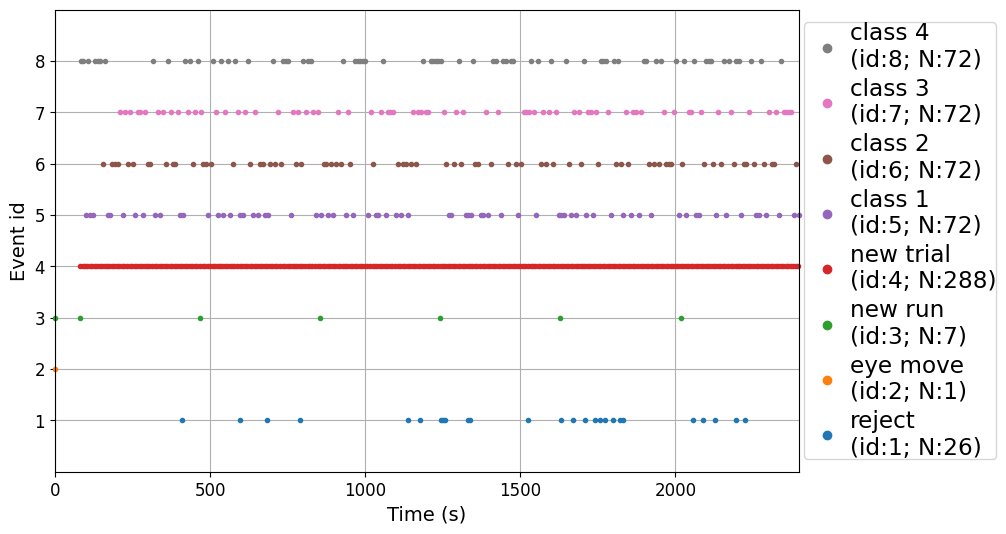

In [ ]:
import numpy as np
import matplotlib.pyplot as plt



import matplotlib.pyplot as plt

# Set larger font sizes globally before plotting
plt.rcParams['font.size'] = 20
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12

fig, ax = plt.subplots(figsize=(12, 6))

mne.viz.plot_events(events[0], event_id=event_dict, sfreq=raw.info['sfreq'], first_samp=raw.first_samp, axes=ax)
#plt.show()
# Create a custom figure with more control
# fig, ax = plt.subplots(figsize=(12, 6))



# Plot events on our custom axis
#mne.viz.plot_events(events[0], event_id=event_dict, sfreq=raw.info['sfreq'], first_samp=raw.first_samp, axes=ax)

# Create legend manually
handles = []
labels = list(event_dict.keys())

# Use matplotlib's default color cycle
colors = plt.cm.tab10(np.linspace(0, 1, len(labels)))

# for i, label in enumerate(labels):
#     handles.append(plt.Line2D([], [], color=colors[i], marker='o',
#                              linestyle='None', markersize=8, label=label))

# Add legend below
# ax.legend(handles=handles,
#           bbox_to_anchor=(0.5, -0.2),
#           loc='upper center',
#           ncol=min(4, len(labels)),  # Adjust columns based on number of items
#           frameon=True)

# plt.tight_layout(rect=[0, 0.15, 1, 0.95])
plt.show()

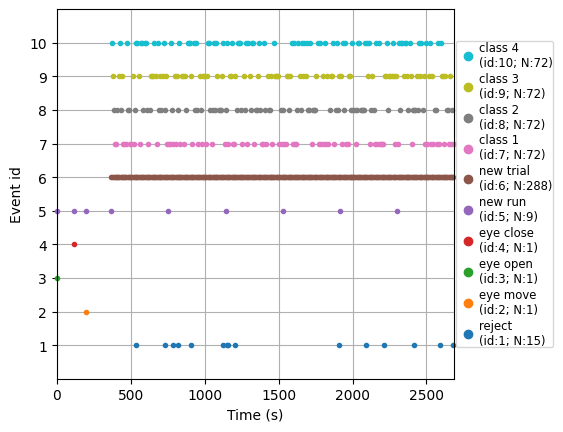

/tmp/ipython-input-913571852.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  legend = ax.legend(bbox_to_anchor=(1.0, -0.15), loc='upper right',
/tmp/ipython-input-913571852.py:14: UserWarning: The figure layout has changed to tight
  fig.tight_layout(rect=[0, 0.1, 1, 0.95])  # Make room at bottom


In [ ]:

fig=mne.viz.plot_events(events[0],event_id=event_dict,sfreq=raw.info['sfreq'],first_samp=raw.first_samp)#events[1][0])

# fig is a matplotlib Figure, so get the Axes
ax = fig.axes[0]

ax = fig.axes[0]

# Position legend below the plot, aligned to right
legend = ax.legend(bbox_to_anchor=(1.0, -0.15), loc='upper right',
                   frameon=True, fancybox=True, shadow=True,
                   ncol=2)  # Use 2 columns to save vertical space

# Adjust layout to accommodate the legend
fig.tight_layout(rect=[0, 0.1, 1, 0.95])  # Make room at bottom
plt.show()


In [ ]:
epoch=mne.Epochs(raw,events[0],event_id=[7,8,9,10], tmin=-0.2,tmax=1, baseline=(-.2,0))

print('==============',(epoch.get_data().shape))


print('==============',len(epoch.drop_log))
H=epoch.drop_log_stats
print('=============H=',(H))


Not setting metadata
288 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 288 events and 301 original time points ...
0 bad epochs dropped
============== (288, 22, 301)
============== 603
=============H= <bound method BaseEpochs.drop_log_stats of <Epochs | 288 events (all good), -0.2 – 1 s (baseline -0.2 – 0 s), ~22 KiB, data not loaded,
 '7': 72
 '8': 72
 '9': 72
 '10': 72>>


Loading data for 287 events and 1551 original time points ...
(287, 22, 951)
xx.shape==== (287, 22, 51)
(71, 22, 1)
(72, 22, 1)
(72, 22, 1)
(72, 22, 1)
(71, 22, 951)
(72, 22, 951)
(72, 22, 951)
(72, 22, 951)
(951,)
(951,)
(951,)
(951,)


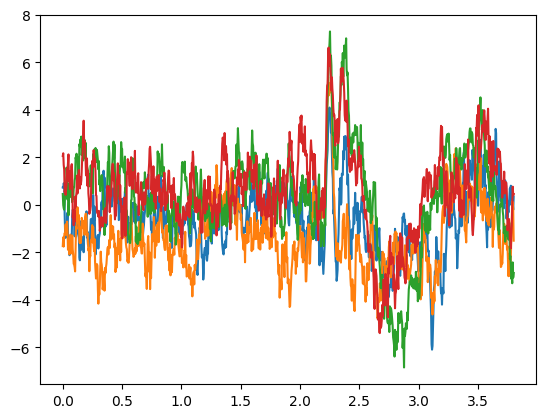

------------------ <class 'numpy.ndarray'>
================== (22, 1551)


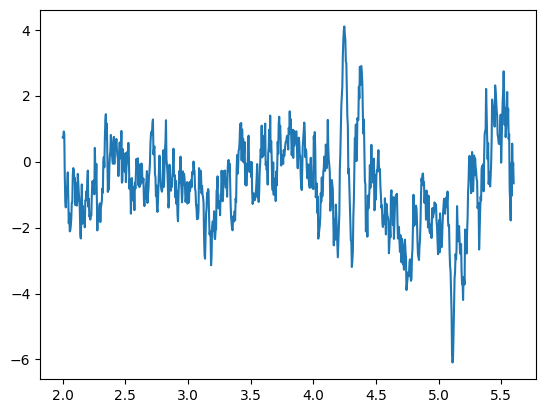

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

y=epoch.events [:,-1]
Xx=epoch.get_data()
#print(epoch.drop_log)
X=Xx[:,:,550:-50]
print(X.shape)
xx=(X[:,:,0:51])
time=np.arange(len(X[0,0,:]))/250
print('xx.shape====',xx.shape)


xclss1_base=xx[y==7].mean(axis=(2),keepdims=True)*1e6
xclss2_base=xx[y==8].mean(axis=(2),keepdims=True)*1e6
xclss3_base=xx[y==9].mean(axis=(2),keepdims=True)*1e6
xclss4_base=xx[y==10].mean(axis=(2),keepdims=True)*1e6

print(xclss1_base.shape)
print(xclss2_base.shape)
print(xclss3_base.shape)
print(xclss4_base.shape)

xclss1=X[y==7 ]-xclss1_base
xclss2=X[y==8 ]-xclss2_base
xclss3=X[y==9 ]-xclss3_base
xclss4=X[y==10]-xclss4_base
#X=np.mean(X,axis=)

print(xclss1.shape)
print(xclss2.shape)
print(xclss3.shape)
print(xclss4.shape)


xclss1=X[y==7 ].mean(axis=(0,1),keepdims=False)*1e6
xclss2=X[y==8 ].mean(axis=(0,1),keepdims=False)*1e6
xclss3=X[y==9 ].mean(axis=(0,1),keepdims=False)*1e6
xclss4=X[y==10].mean(axis=(0,1),keepdims=False)*1e6
#X=np.mean(X,axis=)

print(xclss1.shape)
print(xclss2.shape)
print(xclss3.shape)
print(xclss4.shape)


plt.plot(time,xclss1)
plt.plot(time,xclss2)
plt.plot(time,xclss3)
plt.plot(time,xclss4)
#plt.legend(['class 1','class 2','class 3','class 4'])
plt.show()

#epoch.baseline=(0,51)
G=epoch['7'].average().data
t=epoch.times[550:-100]
print('------------------',type(G))
print('==================',G.shape)

H=G.mean(axis=0)[550:-100]*1e6

plt.plot(t,H)

In [ ]:
labels=epoch.events[:,-1]


In [ ]:
epoch=mne.Epochs(raw,events[0],event_id=[7,8,9,10], tmin=-0.2,tmax=1, baseline=(-.2,0))
evoked_1=epoch['7'].average()
evoked_2=epoch['8'].average()
evoked_3=epoch['9'].average()
evoked_4=epoch['10'].average()

Not setting metadata
288 matching events found
Applying baseline correction (mode: mean)
0 projection items activated


In [ ]:
dicts={'left':evoked_1,'right':evoked_2}#,'foot':evoked_3,'tongue':evoked_4}

combining channels using GFP (eeg channels)
combining channels using GFP (eeg channels)


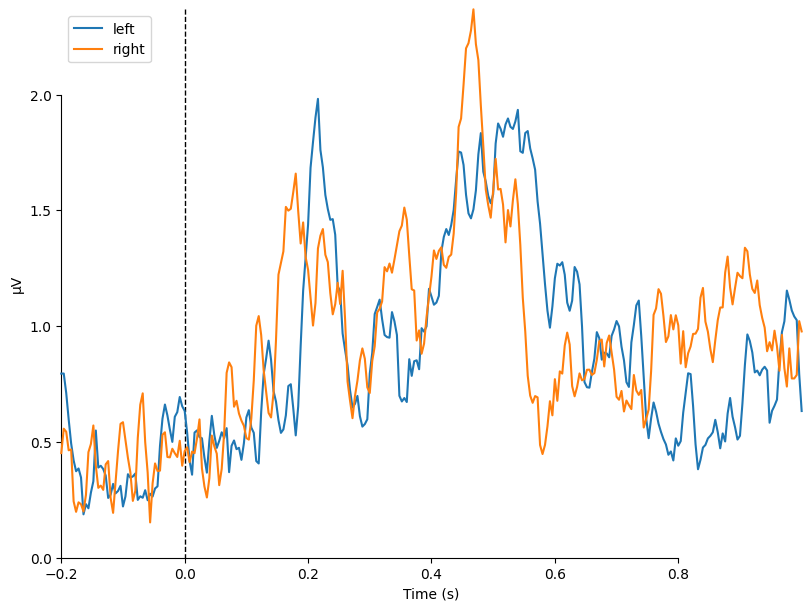

[<Figure size 800x600 with 1 Axes>]

In [ ]:
mne.viz.plot_compare_evokeds(dicts)

# **Applying auto Colllection for all subjects**

In [ ]:
def read_data(path):

  raw=mne.io.read_raw_gdf(path,eog=['EOG-left', 'EOG-central', 'EOG-right'],preload=True)
  raw.drop_channels(['EOG-left', 'EOG-central', 'EOG-right'])
  raw.set_eeg_reference()
  raw.filter(l_freq=3, h_freq=40, method='iir', iir_params={'order': 3, 'ftype': 'butter'})
  events=mne.events_from_annotations(raw)
  if path=='/content/data/A04T.gdf':
      event_dict=[5,6,7,8]
  else:
    event_dict=[7,8,9,10]

  epoch=mne.Epochs(raw,events[0],event_id=event_dict,tmin=-0.2,tmax=6, baseline=(-0.2,0) ,on_missing='warn')
  features=epoch.get_data()
  labels=epoch.events[:,-1]
  return features,labels


In [ ]:
features1,labels1=read_data('/content/data/A01T.gdf')
#features1.shape,labels1.shape

features2,labels2=read_data('/content/data/A02T.gdf')
features3,labels3=read_data('/content/data/A03T.gdf')
features4,labels4=read_data('/content/data/A04T.gdf')
features5,labels5=read_data('/content/data/A05T.gdf')
features6,labels6=read_data('/content/data/A06T.gdf')
features7,labels7=read_data('/content/data/A07T.gdf')
features8,labels8=read_data('/content/data/A08T.gdf')
features9,labels9=read_data('/content/data/A09T.gdf')


# import numpy as np

# Data=np.concatenate((features1,features2,features3,features4,features5,features6,features7,features8,features9),axis=0)
# Labels=np.concatenate((labels1,labels2,labels3,labels4,labels5,labels6,labels7,labels8,labels9),axis=0)



Extracting EDF parameters from /content/data/A01T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG
Creating raw.info structure...
Reading 0 ... 672527  =      0.000 ...  2690.108 secs...


/usr/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 3 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 12 (effective, after forward-backward)
- Cutoffs at 3.00, 40.00 Hz: -6.02, -6.02 dB

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
288 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 1551 original time points ...
1 bad epochs dropped
Extracting EDF parameters from /content/data/A02T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz,

/usr/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 3 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 12 (effective, after forward-backward)
- Cutoffs at 3.00, 40.00 Hz: -6.02, -6.02 dB

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
288 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 1551 original time points ...
1 bad epochs dropped
Extracting EDF parameters from /content/data/A03T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz,

/usr/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 3 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 12 (effective, after forward-backward)
- Cutoffs at 3.00, 40.00 Hz: -6.02, -6.02 dB

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
288 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 1551 original time points ...
1 bad epochs dropped
Extracting EDF parameters from /content/data/A04T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz,

/usr/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 3 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 12 (effective, after forward-backward)
- Cutoffs at 3.00, 40.00 Hz: -6.02, -6.02 dB

Used Annotations descriptions: ['1023', '1072', '32766', '768', '769', '770', '771', '772']
Not setting metadata
288 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 1551 original time points ...
1 bad epochs dropped
Extracting EDF parameters from /content/data/A05T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, 

/usr/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 3 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 12 (effective, after forward-backward)
- Cutoffs at 3.00, 40.00 Hz: -6.02, -6.02 dB

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
288 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 1551 original time points ...
1 bad epochs dropped
Extracting EDF parameters from /content/data/A06T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz,

/usr/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 3 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 12 (effective, after forward-backward)
- Cutoffs at 3.00, 40.00 Hz: -6.02, -6.02 dB

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
288 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 1551 original time points ...
1 bad epochs dropped
Extracting EDF parameters from /content/data/A07T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz,

/usr/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 3 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 12 (effective, after forward-backward)
- Cutoffs at 3.00, 40.00 Hz: -6.02, -6.02 dB

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
288 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 1551 original time points ...
1 bad epochs dropped
Extracting EDF parameters from /content/data/A08T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz,

/usr/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 3 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 12 (effective, after forward-backward)
- Cutoffs at 3.00, 40.00 Hz: -6.02, -6.02 dB

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
288 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 1551 original time points ...
1 bad epochs dropped
Extracting EDF parameters from /content/data/A09T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz,

/usr/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 3 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 12 (effective, after forward-backward)
- Cutoffs at 3.00, 40.00 Hz: -6.02, -6.02 dB

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
288 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 1551 original time points ...
1 bad epochs dropped


In [ ]:
print(features1.shape,labels1.shape)
print(features2.shape,labels2.shape)
print(features3.shape,labels3.shape)
print(features4.shape,labels4.shape)
print(features5.shape,labels5.shape)
print(features6.shape,labels6.shape)
print(features7.shape,labels7.shape)
print(features8.shape,labels8.shape)
print(features9.shape,labels9.shape)

(287, 22, 1551) (287,)
(287, 22, 1551) (287,)
(287, 22, 1551) (287,)
(287, 22, 1551) (287,)
(287, 22, 1551) (287,)
(287, 22, 1551) (287,)
(287, 22, 1551) (287,)
(287, 22, 1551) (287,)
(287, 22, 1551) (287,)


In [ ]:
import scipy.io
from google.colab import files

for i in range(1,10):

  featurevar=globals()[f"features{i}"]
  labels_var=globals()[f"labels{i}"]
  filename={'Data':featurevar,'Labels':labels_var}
  #print(filename['Data'].shape,filename['Labels'].shape)
  scipy.io.savemat(f"subject_0{i}T.mat",filename)

In [ ]:
!zip -r subjcts_data.zip *.mat

  adding: subject_01T.mat (deflated 4%)
  adding: subject_02T.mat (deflated 4%)
  adding: subject_03T.mat (deflated 4%)
  adding: subject_04T.mat (deflated 4%)
  adding: subject_05T.mat (deflated 4%)
  adding: subject_06T.mat (deflated 4%)
  adding: subject_07T.mat (deflated 4%)
  adding: subject_08T.mat (deflated 4%)
  adding: subject_09T.mat (deflated 4%)
